In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('./global_terror_data_proj_1.csv')

In [6]:
df.head()

,iyear,imonth,iday,country_txt,summary,success,attacktype1,attacktype1_txt,target1,targtype1_txt,claimed,gname,weaptype1,weaptype1_txt,nkill
0,1986,2,28,Sweden,2/28/1986: Prime Minister Olof Palme was shot ...,1,2,Armed Assault,Olof Palme,Government (General),1.0,Unknown,5,Firearms,1.0
1,1985,1,0,West Germany (FRG),NaN,0,3,Bombing/Explosion,Headquarters,Military,NaN,Unknown,6,Explosives,0.0
2,1985,1,0,France,NaN,1,9,Unknown,Police Headquarters,Police,NaN,Unknown,13,Unknown,1.0
3,1985,1,0,France,NaN,1,9,Unknown,unknown,Unknown,NaN,Unknown,13,Unknown,0.0
4,1985,1,0,France,NaN,1,9,Unknown,unknown,Unknown,NaN,Unknown,13,Unknown,0.0


In [31]:
ter_df = df[["country_txt", "attacktype1", "targtype1_txt"]]
ter_df.head()

,country_txt,attacktype1,targtype1_txt
0,Sweden,2,Government (General)
1,West Germany (FRG),3,Military
2,France,9,Police
3,France,9,Unknown
4,France,9,Unknown


In [10]:
G=nx.from_pandas_dataframe(ter_df, "country_txt", "attacktype1", "targtype1_txt")
print (nx.info(G))

Name: 
Type: Graph
Number of nodes: 204
Number of edges: 1226
Average degree:  12.0196


In [12]:
from pyvis import network as net
N = net.Network(
                bgcolor='#222222', font_color='white', 
               notebook=True)
N.barnes_hut()
for n in G.nodes():
    N.add_node(n)
for e in G.edges():
    N.add_edge(e[0], e[1])

In [13]:
N.show('test.html')

In [ ]:
ter_df_2 = df[["country_txt", "gname","attacktype1"]]

In [ ]:
H=nx.from_pandas_dataframe(ter_df_2, "country_txt", "gname","attacktype1")
N_2 = net.Network(bgcolor='#222222',
                  font_color='white',
                  height='1000px',
                  width='1000px',
                  notebook=True)
N_2.barnes_hut()
for n in H.nodes():
    N_2.add_node(n)
for e in H.edges():
    N_2.add_edge(e[0], e[1])

In [ ]:
N_2.show('test_2.html')

In [32]:
ter_df['index'] = df.index 
ter_df = ter_df.set_index('index')


C:\ProgramData\Anaconda3\envs\data620_web\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
ter_df.head()

,country_txt,attacktype1,targtype1_txt
index,,,
0,Sweden,2,Government (General)
1,West Germany (FRG),3,Military
2,France,9,Police
3,France,9,Unknown
4,France,9,Unknown


In [34]:
ter_df = ter_df.reindex(G.nodes())

In [35]:
ter_df['attacktype1']=pd.Categorical(ter_df['attacktype1'])

In [36]:
ter_df['attacktype1'].cat.codes

index
Sweden               -1
2                     1
West Germany (FRG)   -1
3                     1
France               -1
                     ..
Turkmenistan         -1
Serbia-Montenegro    -1
Bhutan               -1
Serbia               -1
South Sudan          -1
Length: 204, dtype: int8

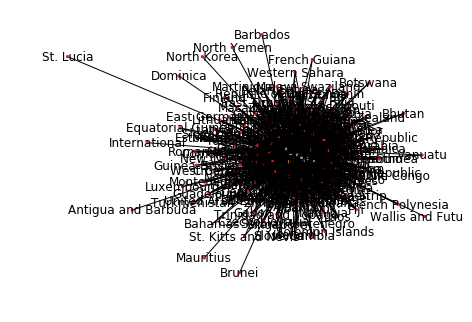

In [38]:
nx.draw(G, with_labels=True, node_color=ter_df['attacktype1'].cat.codes, cmap=plt.cm.Set1, node_size=5)